In [1]:
from complex_loss_func_v1_framework import *

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
🔥 text_pretraining_data/eng_sentences_pruned-train.txt
🔥 text_pretraining_data/eng_sentences_pruned-eval.txt


In [2]:
S = get_settings_batch(1)

In [3]:
device

device(type='cuda', index=0)

In [4]:
imgs = get_images(S)

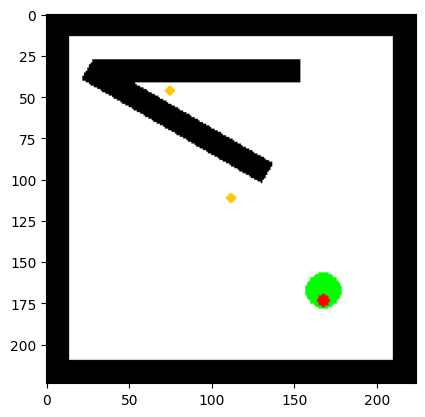

In [5]:
import matplotlib.pyplot as plt
plt.imshow(G.getData())

In [6]:
def quick_display(torch_img):
    clean = torch_img.detach().cpu()
    right_order = torch.permute(clean, (1, 2, 0))
    array = right_order.numpy()
    plt.imshow(array)

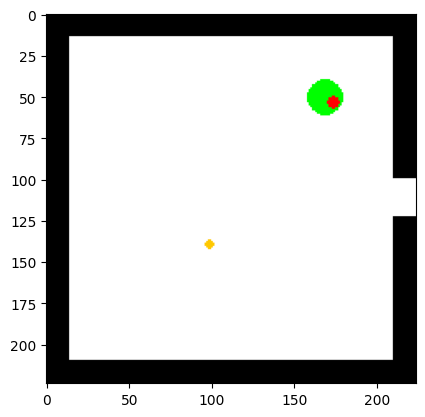

In [7]:
quick_display(imgs[0])

In [8]:
torch.max(imgs)

tensor(1., device='cuda:0')

In [9]:
epsilon=3.0/(255*255)
differentiable=True

In [10]:
RED

(255, 0, 0)

In [11]:
red_masks = get_color_masks(imgs, RED, epsilon, differentiable)

In [12]:
green_masks = get_color_masks(imgs, GREEN, epsilon, differentiable)

In [13]:
GREEN

(0, 255, 0)

In [14]:
torch.max(red_masks)

tensor(1.0000, device='cuda:0')

In [15]:
x = np.arange(0, 1.0, 0.01)

In [16]:
epsilon

4.61361014994233e-05

In [17]:
y = (F.sigmoid((1.0 + 0.05 - torch.tensor(x)) ** 50)*2 - 1.0).numpy()

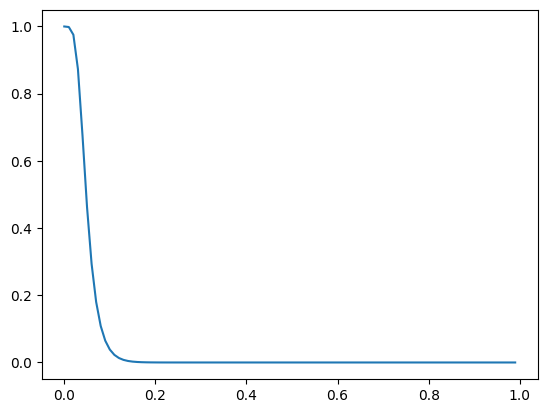

In [18]:
plt.plot(x, y)
plt.show()

In [19]:
y[0]

0.9999790686614716

In [20]:
z = torch.tensor(GREEN) / 255 - torch.tensor(GOLD) / 255
torch.sum(z * z)

tensor(1.0465)

In [21]:
red_masks.size()

torch.Size([1, 224, 224])

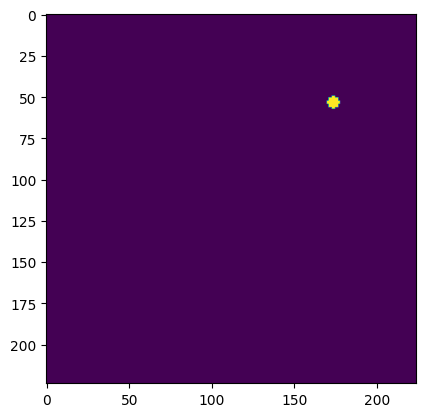

In [22]:
plt.imshow(red_masks[0].cpu().numpy())

In [23]:
from visual_transformer import *
from visual_transformer.enhanced_model import *

In [24]:
brain = EnhancedAgentBrain()
brain.move_to(device) # special function that wraps 'to'. Dumb? yes. Needed? Also yes.

#fname = 'brain_checkpoints/enhanced_brain_first_training_batch10000.pth'
#fname = 'brain_checkpoints/enhanced_brain_first_training_v2_batch160799.pth'
#fname = 'brain_checkpoints/enhanced_brain_control_training_v1_batch16600.pth'
#fname = 'brain_checkpoints/enhanced_brain_control_training_v2_batch55900.pth'
#fname = 'brain_checkpoints/enhanced_brain_arrow_task_v1_batch1199.pth'
#fname = 'brain_checkpoints/enhanced_brain_arrow_task_v2_batch24800.pth'
#fname = 'brain_checkpoints/enhanced_brain_arrow_task_v3_batch155466.pth'
#fname = 'brain_checkpoints/enhanced_brain_arrow_task_v4_batch399.pth'
#fname = 'brain_checkpoints/enhanced_brain_arrow_task_v5_batch133.pth'
#fname = 'brain_checkpoints/enhanced_brain_canvas_use_v1_batch14250.pth'
#fname = 'brain_checkpoints/enhanced_brain_canvas_use_v2_batch29398.pth'
#fname = 'brain_checkpoints/super_brain_transferred_weights.pth'
#fname = 'brain_checkpoints/super_brain_retraining_control_arrow_v1_batch33400.pth'
#fname = 'brain_checkpoints/super_brain_retraining_control_arrow_RESTART_v1_batch31799.pth'
#fname = 'brain_checkpoints/frankenstein_transferred.pth'
#fname = 'brain_checkpoints/frankenstein_canvases_v1_batch33597.pth'
#fname = 'brain_checkpoints/frankenstein_canvases_v2_batch25999.pth'
#fname = 'brain_checkpoints/frankenstein_canvases_v3_batch19998.pth'
#fname = 'brain_checkpoints/frankenstein_tutorialQA_v2_batch9996.pth'
#fname = 'brain_checkpoints/frankenstein_tutorialQA_v6_batch10993.pth'
#fname = 'brain_checkpoints/frankenstein_tutorialQA_v8_batch13196.pth'
#fname = 'brain_checkpoints/frankenstein_blueLineDirection_v1_batch34120.pth'
#fname = 'brain_checkpoints/frankenstein_blueLineDirection_v2_batch17843.pth'
fname = 'brain_checkpoints/frankenstein_allQA_v1_batch262921.pth'

# A little extra code to avoid weird error
#brain.memory.remember(torch.randn(16, 1, 768).to(device))
brain.memory.remember(torch.randn(8, 1, 768).to(device))

brain.load_state_dict(torch.load(fname, weights_only=True, map_location=device))
brain.reset()

In [25]:
sdt[0]

tensor([   0,  843,  325, 1083,  711,   18,    2,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0])

In [26]:
probs, recon = brain(sdt[0].unsqueeze(0).cuda(), imgs, ret_imgs=True)

/home/atbolsh/anaconda3/envs/llava-florence/lib/python3.12/site-packages/torch/_tensor.py:955: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.22476831..1.2658665].


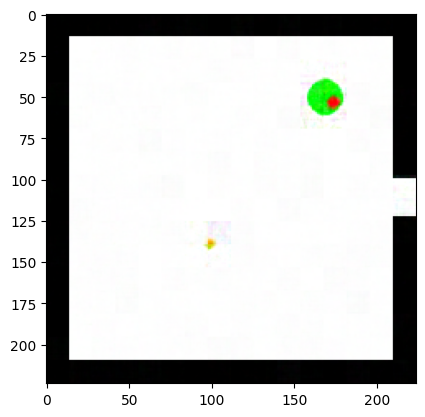

In [27]:
quick_display(recon[0])

In [28]:
masks = get_color_masks(recon, GOLD, epsilon, differentiable)

In [29]:
torch.max(masks)

tensor(0.9999, device='cuda:0', grad_fn=<MaxBackward1>)

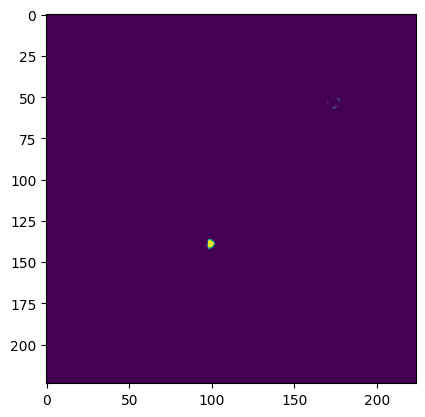

In [32]:
plt.imshow(masks[0].detach().cpu().numpy())